In [79]:
from random import randint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
from sklearn.metrics import confusion_matrix

In [80]:
#class is from A (best) to D (worst)
body_performance_data = pd.read_csv("bodyPerformance.csv")
body_performance_data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [81]:
body_performance_data.shape

(13393, 12)

In [82]:
body_performance_data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [83]:
body_performance_data["class"].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [84]:
body_performance_data["gender"].value_counts()

M    8467
F    4926
Name: gender, dtype: int64

In [85]:
features = body_performance_data.drop('class', axis = 1)
target = body_performance_data[['class']]

In [86]:
categorical_features = features[['gender']].copy()
categorical_features.head()

,gender
0,M
1,M
2,M
3,M
4,M


In [87]:
numeric_features = features.drop(['gender'], axis =1)
numeric_features.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


In [88]:
gender_dict = {'F':0, 'M':1}
categorical_features['gender'].replace(gender_dict, inplace = True)
categorical_features.sample(10)

,gender
12347,0
9344,0
6935,1
9120,1
6728,1
8558,1
2118,1
2328,1
5905,0
6969,0


In [89]:
standardScaler = StandardScaler()
numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                                columns=numeric_features.columns,
                                index=numeric_features.index)
numeric_features.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,1.339300e+04,1.339300e+04,1.339300e+04,1.339300e+04,1.339300e+04,1.339300e+04,1.339300e+04,1.339300e+04,1.339300e+04,1.339300e+04
mean,2.647712e-16,-8.891649e-16,5.046228e-16,-1.134180e-16,1.522650e-15,8.187449e-16,-3.341736e-17,-4.555122e-17,6.244538e-17,3.375101e-17
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.157795e+00,-5.169526e+00,-3.443515e+00,-2.789218e+00,-7.335649e+00,-8.851440e+00,-3.479128e+00,-4.754914e+00,-2.785848e+00,-4.769156e+00
25%,-8.642197e-01,-7.310244e-01,-7.738845e-01,-7.221267e-01,-7.258526e-01,-6.956117e-01,-8.907625e-01,-5.095890e-01,-6.844432e-01,-7.055954e-01
50%,-3.504632e-01,7.597582e-02,-3.959736e-03,-6.065741e-02,1.891317e-02,-1.595937e-02,8.811007e-02,1.171582e-01,8.607187e-02,7.199959e-02
75%,8.238375e-01,7.405642e-01,6.571713e-01,6.559343e-01,6.705832e-01,7.316582e-01,7.752033e-01,6.493019e-01,7.164933e-01,7.743435e-01
max,1.998138e+00,2.995418e+00,5.912744e+00,7.601361e+00,7.205903e+00,4.809572e+00,3.156499e+00,2.338958e+01,2.817898e+00,2.831208e+00


In [90]:
target = pd.get_dummies(target)
target.head()

,class_A,class_B,class_C,class_D
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [91]:
processed_features = pd.concat([categorical_features, numeric_features], axis = 1, sort = False)
processed_features.head()

,gender,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,1,-0.717432,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009
1,1,-0.864220,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013
2,1,-0.423857,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005
3,1,-0.350463,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176
4,1,-0.644038,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009


In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                   target,
                                                   test_size = 0.2,
                                                   random_state=1)

In [93]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(2 * len(x_train.keys()), activation ='relu', input_shape = [len(x_train.keys())]),
        layers.Dense(4, activation = 'softmax')
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    
    model.compile(loss='categorical_crossentropy',
                 optimizer="adam",
                 metrics=['accuracy'])
    return model

In [94]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

NameError: name 'KerasClassifier' is not defined

In [95]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 22)                264       
                                                                 
 dense_5 (Dense)             (None, 4)                 92        
                                                                 
Total params: 356
Trainable params: 356
Non-trainable params: 0
_________________________________________________________________


In [96]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
training_hist = model.fit(x_train,
                                 y_train,
                                 epochs = 2000,
                                 validation_split = 0.2,
                                 verbose = True,
                                 callbacks=[early_stop])

Epoch 1/2000
268/268 [==============================] - 1s 2ms/step - loss: 1.2240 - accuracy: 0.4350 - val_loss: 1.0458 - val_accuracy: 0.5296
Epoch 2/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.9926 - accuracy: 0.5579 - val_loss: 0.9161 - val_accuracy: 0.5996
Epoch 3/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.9093 - accuracy: 0.5967 - val_loss: 0.8713 - val_accuracy: 0.6164
Epoch 4/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.8777 - accuracy: 0.6138 - val_loss: 0.8555 - val_accuracy: 0.6202
Epoch 5/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.8600 - accuracy: 0.6223 - val_loss: 0.8441 - val_accuracy: 0.6300
Epoch 6/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.8483 - accuracy: 0.6283 - val_loss: 0.8319 - val_accuracy: 0.6281
Epoch 7/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.8385 - accuracy: 0.6327 - val_loss: 0.8245 - val_accuracy:

268/268 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.7343 - val_loss: 0.6678 - val_accuracy: 0.7112
Epoch 58/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.7367 - val_loss: 0.6657 - val_accuracy: 0.7126
Epoch 59/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7367 - val_loss: 0.6655 - val_accuracy: 0.7186
Epoch 60/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.7387 - val_loss: 0.6676 - val_accuracy: 0.7140
Epoch 61/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.7362 - val_loss: 0.6667 - val_accuracy: 0.7186
Epoch 62/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.7385 - val_loss: 0.6636 - val_accuracy: 0.7182
Epoch 63/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7396 - val_loss: 0.6640 - val_accuracy: 0.7219

268/268 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.7446 - val_loss: 0.6447 - val_accuracy: 0.7219
Epoch 114/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.7466 - val_loss: 0.6430 - val_accuracy: 0.7289
Epoch 115/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.7458 - val_loss: 0.6429 - val_accuracy: 0.7284
Epoch 116/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7479 - val_loss: 0.6467 - val_accuracy: 0.7298
Epoch 117/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.7447 - val_loss: 0.6431 - val_accuracy: 0.7228
Epoch 118/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.7472 - val_loss: 0.6439 - val_accuracy: 0.7261
Epoch 119/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.7461 - val_loss: 0.6448 - val_accuracy: 

268/268 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.7476 - val_loss: 0.6387 - val_accuracy: 0.7312
Epoch 170/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7493 - val_loss: 0.6376 - val_accuracy: 0.7359
Epoch 171/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.7508 - val_loss: 0.6382 - val_accuracy: 0.7354
Epoch 172/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.7510 - val_loss: 0.6390 - val_accuracy: 0.7368
Epoch 173/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7499 - val_loss: 0.6409 - val_accuracy: 0.7345
Epoch 174/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7523 - val_loss: 0.6382 - val_accuracy: 0.7406
Epoch 175/2000
268/268 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7493 - val_loss: 0.6389 - val_accuracy: 

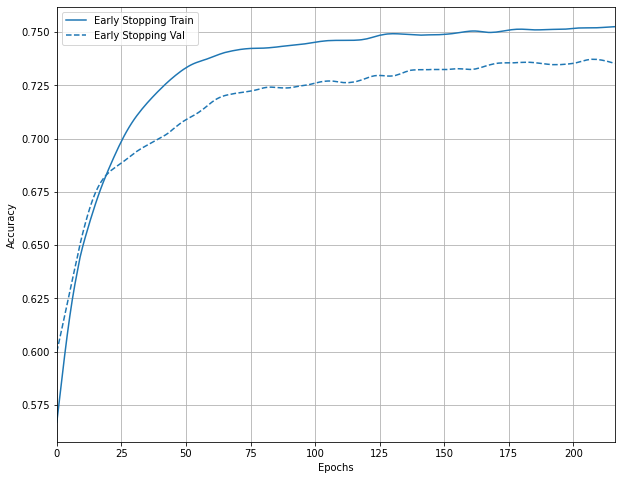

In [97]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plt.figure(figsize=(10,8))
plotter.plot({'Early Stopping': training_hist}, metric = "accuracy")
plt.ylabel("Accuracy")
plt.show()

In [98]:
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5

In [99]:
confusion_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
cm_table = pd.DataFrame(confusion_matrix,
                     index = ['A','B','C', 'D'], 
                     columns = ['A','B','C', 'D'])

In [100]:
cm_table.head()

,A,B,C,D
A,607,31,4,3
B,264,307,80,15
C,121,92,403,63
D,34,28,69,558


In [102]:
processed_data = pd.concat([processed_features, target], axis=1, sort=False)
processed_data.to_csv('processed_data.csv', index = False)